In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df = df [['carat','depth','table','price','x','y','z']]

In [5]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
X = df.drop('y',axis=1)
X.head()

,carat,depth,table,price,x,z
0,0.23,61.5,55.0,326,3.95,2.43
1,0.21,59.8,61.0,326,3.89,2.31
2,0.23,56.9,65.0,327,4.05,2.31
3,0.29,62.4,58.0,334,4.20,2.63
4,0.31,63.3,58.0,335,4.34,2.75


In [8]:
y = df['y']
y.head()

0    3.98
1    3.84
2    4.07
3    4.23
4    4.35
Name: y, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split 
#함수를 가져와, 데이터를 훈련 세트와 테스트 세트로 나눔

X_train, X_test, y_train, y_test=train_test_split(
    X, # X는 독립 변수(특징 데이터), y는 종속 변수(타깃 값)
    y,
    test_size=0.2, # **test_size=0.2**는 데이터의 20%를 테스트 세트로, 80%를 훈련 세트로 사용하겠다는 의미
    shuffle=True, # 데이터를 무작위로 섞어 훈련 및 테스트 세트에 배치하는 옵션
    random_state=12
    )
    
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43152, 6) (43152,)
(10788, 6) (10788,)


In [10]:
from sklearn.linear_model import LinearRegression #  선형 회귀 모델
from sklearn.metrics import mean_squared_error # 평균제곱오차(MSE)

In [11]:
model = LinearRegression() #객체 저장
model.fit(X_train, y_train) # 훈련 데이터를 이용해 선형 회귀 모델을 훈련(fit)
ly_preds = model.predict(X_test) #훈련된 모델을 사용해 테스트 세트인 X_test의 예측값을 구해 ly_preds에 저장

In [12]:
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 0.006306335731259568


In [13]:
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

In [14]:
print('평균제곱근오차', mse_np(ly_preds, y_test))

평균제곱근오차 0.006306335731259568


In [15]:
def mse(actual, predicted): # 파이썬 기본 기능을 사용해 MSE를 계산하는 함수를 정의
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted)) #실제값과 예측값의 차이를 제곱한 값을 모두 더함
    mean_square_error = sum_square_error / len(actual) #그 값을 데이터 포인트 수로 나누어 평균을 계산
    return mean_square_error  

In [16]:
print('평균제곱근오차', mse(ly_preds, y_test)) #함수를 호출해 파이썬 코드로 MSE를 계산하고 출력

평균제곱근오차 0.006306335731259599


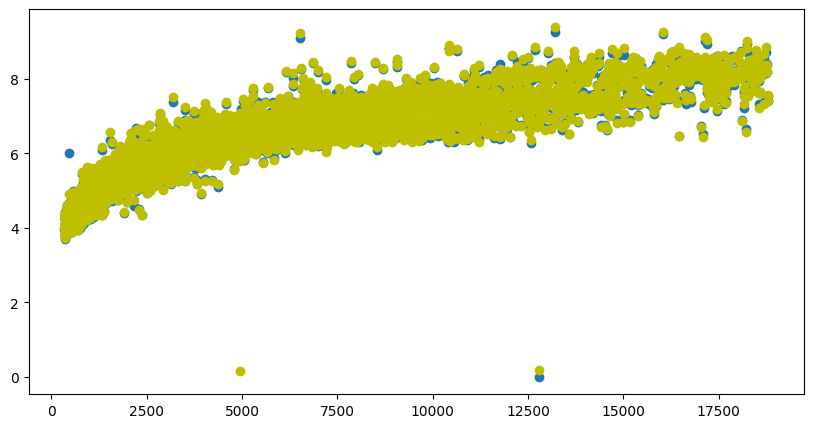

In [17]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['price'], y_test, label='y_test') #(피부 두께) 데이터를 x축으로 설정하고, **y_test**를 y축으로 설정
plt.scatter(X_test['price'], ly_preds, c='y', label='ly_preds') #선형 회귀 모델이 예측한 값(ly_preds)**을 산점도
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [18]:
from sklearn.tree import DecisionTreeRegressor #결정 트리 회귀 모델

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test) #테스트 세트(X_test)**의 예측값을 구하여 **dy_preds**에 저장
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))
# 실제값(y_test)**과 예측값(dy_preds) 사이의 **평균제곱오차(MSE)**를 계산

평균제곱근오차 0.006031466289704611


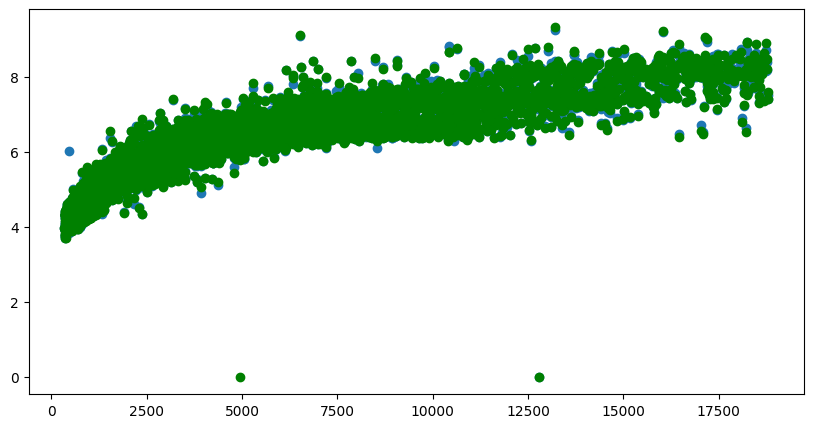

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['price'], y_test, label='y_test')
plt.scatter(X_test['price'], dy_preds, c='g', label='dy_preds')
plt.show()         

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['price'], y_test, label='y_test')
plt.scatter(X_test['price'], ry_preds, c='orange', label='ry_preds')

plt.show() 